In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
plt.rc('text', usetex=True)
plt.rc('font', family='Serif')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['font.size'] = 27

mpl.rcParams['savefig.dpi'] = 150 
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10 
mpl.rcParams['xtick.minor.size'] = 5 

mpl.rcParams['ytick.major.size'] = 10 
mpl.rcParams['ytick.minor.size'] = 5 

mpl.rcParams['xtick.labelsize'] = 23
mpl.rcParams['ytick.labelsize'] = 23

In [5]:
M55_path = 'C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\GC_ages\\M55'
M92_path = 'C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\GC_ages\\M92'

In [6]:
df = pd.read_csv("{}\\M55.dat".format(M55_path),sep='\s+')
df

,id,x,y,Vvega,err,VIvega,err.1,Ivega,err.2,Vground,...,wV,wI,xsig,ysig,othv,othi,qfitV,qfitI,RA,Dec
0,1,2211.455,986.692,21.218,0.0126,0.918,0.0171,20.300,0.0116,21.488,...,1,1,0.001,0.010,0.000,0.000,0.048,0.034,295.010419,-30.990310
1,2,2266.746,975.827,20.071,0.0074,0.729,0.0105,19.342,0.0074,20.278,...,1,1,0.001,0.000,0.000,0.001,0.034,0.033,295.009523,-30.990461
2,3,2278.684,982.716,18.630,0.0038,0.578,0.0056,18.052,0.0041,18.780,...,1,1,0.009,0.009,0.002,0.006,0.025,0.021,295.009330,-30.990365
3,4,2282.782,968.991,22.733,0.0255,1.207,0.0327,21.526,0.0205,23.088,...,1,1,0.015,0.054,0.020,0.004,0.111,0.097,295.009263,-30.990556
4,5,2277.373,987.045,22.271,0.0206,1.174,0.0265,21.097,0.0168,22.616,...,1,1,0.021,0.025,1.655,0.862,0.191,0.160,295.009351,-30.990305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47156,47157,3765.948,5013.908,22.657,0.0233,1.151,0.0301,21.506,0.0192,22.997,...,1,1,0.009,0.015,0.000,0.000,0.113,0.090,294.985241,-30.934376
47157,47158,3786.379,5020.892,21.524,0.0137,0.979,0.0184,20.545,0.0123,21.813,...,1,1,0.005,0.018,0.000,0.000,0.049,0.054,294.984910,-30.934279
47158,47159,3799.485,4990.726,20.503,0.0086,0.804,0.0119,19.699,0.0083,20.736,...,1,1,0.011,0.012,0.000,0.000,0.051,0.037,294.984698,-30.934698
47159,47160,3825.946,4992.130,22.922,0.0263,1.066,0.0346,21.856,0.0225,23.237,...,1,1,0.003,0.006,0.000,0.000,0.152,0.088,294.984269,-30.934679


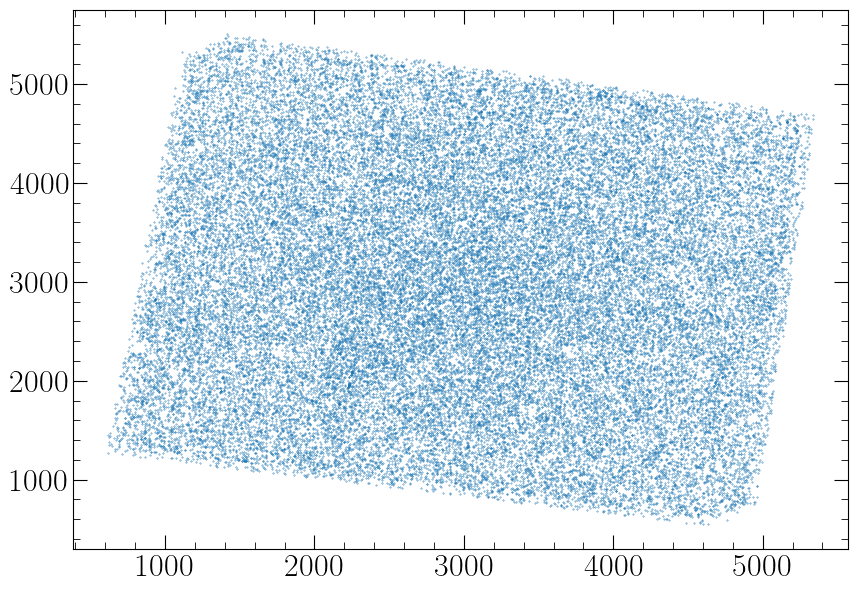

In [7]:
plt.scatter(df['x'],df['y'],s=0.1)

In [8]:
#determin center
x_guess,y_guess = 3000,3000
radius = 200
def centeroidnp(df):
    fit_stars = df[((df['x']-x_guess)**2 + (df['y']-y_guess)**2) < radius**2]
    length = len(fit_stars)
    x = fit_stars['x'].values
    y = fit_stars['y'].values
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    return sum_x/length, sum_y/length
x_cen, y_cen = centeroidnp(df)
print("X Center is: {}".format(x_cen))
print("Y Center is: {}".format(y_cen))

X Center is: 2998.123885281385
Y Center is: 2995.5184415584417


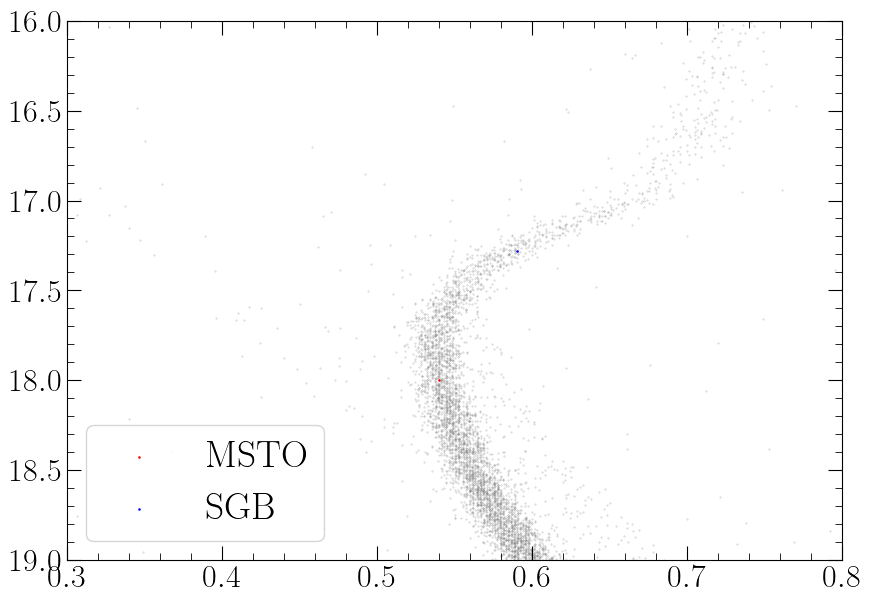

In [9]:
#determine MSTO and SGB
plt.scatter(df['VIvega'],df['Vvega'],s=0.1,alpha=0.5,c='grey')
plt.xlim(0.3,0.8)
plt.ylim(16,19)
plt.scatter(0.54,18.0,s=0.7,c='r',label='MSTO')
plt.scatter(0.54+0.05,17.28,s=0.7,c='b',label='SGB')
plt.legend()
plt.gca().invert_yaxis()

$$\textup{V}_{\textup{MSTO}} = 18.0$$
$$\textup{VI}_{\textup{MSTO}} = 0.54$$
$$\textup{V}_{\textup{SGB}} = 17.28$$
$$\textup{VI}_{\textup{SGB}} = 0.59$$

(18.6, 18.7)

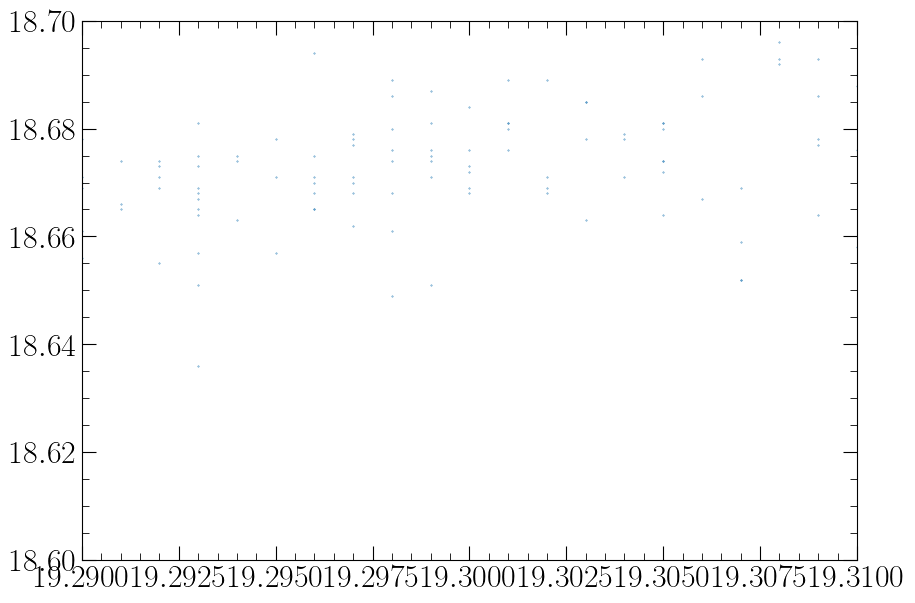

In [22]:
plt.scatter(df['Vvega'],df['Ivega'],s=0.1)
plt.xlim(19.29,19.31)
plt.ylim(18.6,18.7)

In [14]:
M55_fitstars = pd.DataFrame(columns=['v','v_err','i','i_err','vi','vi_err','x','y'])

Series([], Name: v, dtype: object)

In [25]:
df_first_cut = df[(df['Vvega'] < 19.28) & (df['Vvega'] > 15.28)]
df_first_cut

,id,x,y,Vvega,err,VIvega,err.1,Ivega,err.2,Vground,...,wV,wI,xsig,ysig,othv,othi,qfitV,qfitI,RA,Dec
2,3,2278.684,982.716,18.630,0.0038,0.578,0.0056,18.052,0.0041,18.780,...,1,1,0.009,0.009,0.002,0.006,0.025,0.021,295.009330,-30.990365
8,9,2451.712,968.601,18.809,0.0041,0.587,0.0061,18.222,0.0044,18.964,...,1,1,0.006,0.000,0.000,0.000,0.018,0.024,295.006527,-30.990562
29,30,2754.560,883.018,18.635,0.0038,0.573,0.0056,18.062,0.0041,18.783,...,1,1,0.004,0.003,0.000,0.000,0.025,0.020,295.001620,-30.991750
35,36,2765.354,985.549,18.944,0.0044,0.589,0.0064,18.355,0.0047,19.098,...,1,1,0.001,0.005,0.000,0.000,0.013,0.021,295.001445,-30.990326
54,55,2913.994,974.980,19.221,0.0120,0.636,0.0120,18.585,0.0010,19.394,...,1,1,0.008,0.001,0.000,0.000,0.033,0.032,294.999037,-30.990473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47126,47127,3475.666,5046.050,18.580,0.0035,0.574,0.0052,18.006,0.0038,18.730,...,1,1,0.003,0.009,0.000,0.000,0.044,0.017,294.989941,-30.933930
47138,47139,3541.681,5008.010,19.111,0.0045,0.614,0.0066,18.497,0.0048,19.276,...,1,1,0.003,0.017,0.000,0.000,0.028,0.015,294.988873,-30.934459
47144,47145,3652.334,5007.633,18.051,0.0028,0.548,0.0041,17.503,0.0030,18.190,...,1,1,0.002,0.007,0.001,0.001,0.047,0.016,294.987081,-30.934464
47147,47148,3663.224,5005.632,18.341,0.0032,0.553,0.0047,17.788,0.0034,18.481,...,1,1,0.002,0.005,0.003,0.002,0.032,0.020,294.986904,-30.934492


In [40]:
M55_fitstars = pd.DataFrame(columns=['v','v_err','i','i_err','vi','vi_err','x','y'])
df_first_cut = df[(df['Vvega'] < 19.28) & (df['Vvega'] > 15.28)]
Vvega = df_first_cut['Vvega'].values
Ivega = df_first_cut['Ivega'].values
VIvega = df_first_cut['VIvega'].values
for i in range(len(Vvega)):
    xp = [15.046 , 15.838, 16.39, 17.524,17.519,17.523,18.039,18.003,18.546,18.565,19.041,19.091,19.30]
    fp = [14.271, 15.099 , 15.641, 16.972,17.009 ,16.961,17.494 ,17.523,17.973 ,17.993,18.43,18.481,18.68]
    x = Vvega[i]
    ivega_needed = np.interp(x,xp,fp) #new linear interpolation
    if (((ivega_needed + .08) > Ivega[i]) & (Ivega[i] > (ivega_needed - .08))):
         if VIvega[i]<1 and VIvega[i]>0.46:
            new_row = {'v':df_first_cut['Vvega'].values[i],'v_err':df_first_cut['err'].values[i],'i':df_first_cut['Ivega'].values[i],'i_err':df_first_cut['err.2'].values[i],'vi':df_first_cut['VIvega'].values[i],'vi_err':df_first_cut['err.1'].values[i],'x':df_first_cut['x'].values[i],'y':df_first_cut['y'].values[i]}
            M55_fitstars = M55_fitstars.append(new_row, ignore_index=True)

C:\Users\marti\AppData\Local\Temp\ipykernel_27052\3388761179.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M55_fitstars = M55_fitstars.append(new_row, ignore_index=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_27052\3388761179.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M55_fitstars = M55_fitstars.append(new_row, ignore_index=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_27052\3388761179.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M55_fitstars = M55_fitstars.append(new_row, ignore_index=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_27052\3388761179.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [41]:
M55_fitstars

,v,v_err,i,i_err,vi,vi_err,x,y
0,18.630,0.0038,18.052,0.0041,0.578,0.0056,2278.684,982.716
1,18.809,0.0041,18.222,0.0044,0.587,0.0061,2451.712,968.601
2,18.635,0.0038,18.062,0.0041,0.573,0.0056,2754.560,883.018
3,18.944,0.0044,18.355,0.0047,0.589,0.0064,2765.354,985.549
4,19.221,0.0120,18.585,0.0010,0.636,0.0120,2913.994,974.980
...,...,...,...,...,...,...,...,...
6125,18.580,0.0035,18.006,0.0038,0.574,0.0052,3475.666,5046.050
6126,19.111,0.0045,18.497,0.0048,0.614,0.0066,3541.681,5008.010
6127,18.051,0.0028,17.503,0.0030,0.548,0.0041,3652.334,5007.633
6128,18.341,0.0032,17.788,0.0034,0.553,0.0047,3663.224,5005.632


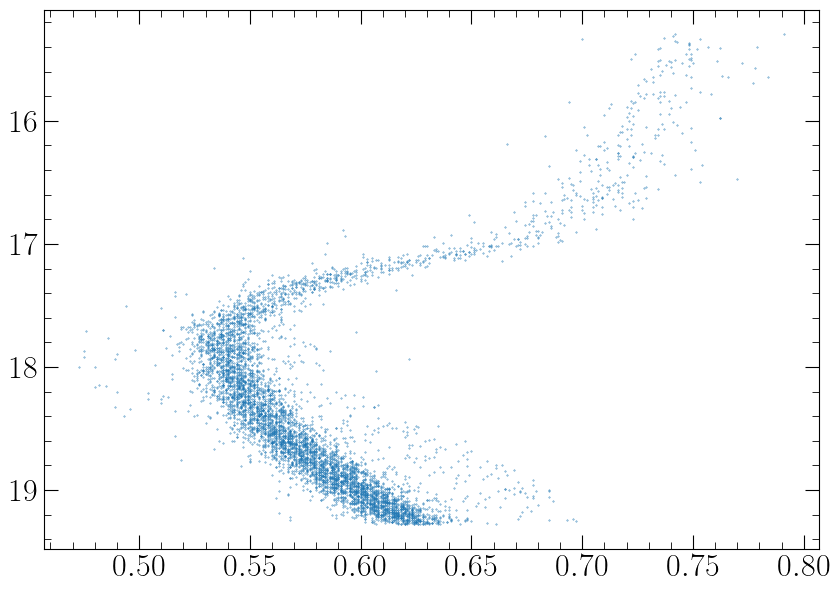

In [42]:
plt.scatter(M55_fitstars['vi'],M55_fitstars['v'],s=0.1)
plt.gca().invert_yaxis()

In [45]:
M55_fitstars.to_csv("{}\\M55_fitstars.dat".format(M55_path),sep=',')